# IBM Machine Learning: Classification Capstone Project

*by Evangelos Tselentis - Straitouris*

## Introduction

The heart is an amazing organ. It continuously pumps oxygen and nutrient-rich blood throughout your body to sustain life. This fist-sized powerhouse beats (expands and contracts) 100,000 times per day pumping 23,000 liters (5,000 gallons) of blood every day. To work properly, the heart (just like any other muscle) needs a good blood supply.

A heart attack (also known as myocardial infarction; MI) is defined as the sudden blockage of blood flow to a portion of the heart. Some of the heart muscle begins to die during a heart attack, and without early medical treatment, the loss of the muscle could be permanent. 

Conditions such as high blood pressure, high blood cholesterol, obesity, and diabetes can raise the risk of a heart attack.  Behaviors such as an unhealthy diet, low levels of physical activity, smoking, and excessive alcohol consumption can contribute to the conditions that can cause heart attacks.  Some factors, such as age and family history of heart disease, cannot be modified but are associated with a higher risk of a heart attack. 

## Dataset

For the exploration of the risk a person has to develop a heart attack (**prediction** analysis), the [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) from *kaggle.com* was utilized. It consists of:

+ Age of the patient (age in years)
+ Sex of the patient (sex; 1 = male, 0 = female)
+ Exercise induced angina (exng; 1 = yes, 0 = no)
+ Number of major vessels (ca; 0-3)
+ Chest pain type (cp; Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
+ Resting blood pressure (trestpbs; in mm/Hg on admission to the hospital)
+ Cholesterol levels (chol; in mg/dl)
+ Fasting blood sugar (fbs; if > 120 mg/dl, 1 = true; 0 = false)
+ Resting electrocardiographic results (rest_ecg; 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
+ Maximum heart rate achieved (thalach)
+ Chance of heart attack (target: Heart disease)
+ A blood disorder called thalassemia (thall; 1 = normal; 2 = fixed defect; 3 = reversable defect)
+ Previous peak (oldpeak; ST depression induced by exercise relative to rest - ‘ST’ relates to positions on the ECG plot)
+ Slope (slp; the slope of the peak exercise ST segment, Value 1: upsloping, Value 2: flat, Value 3: downsloping)


### Acknowledgements

*Creators*:

    Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set()

In [4]:
heart = pd.read_csv('heart.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature Engineering

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
duplicate=heart[heart.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
heart_attack = heart.drop_duplicates()

In [10]:
heart_attack['target'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

In [11]:
heart_attack.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heart_attack = heart_attack.reset_index(drop=True)

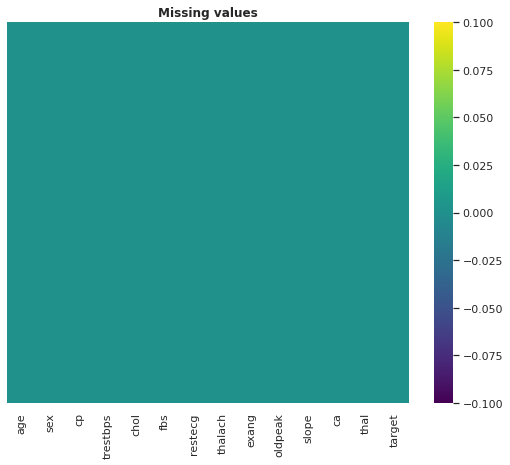

In [13]:
plt.figure(figsize=(9,7))
plt.title('Missing values', fontweight='bold')

ax = sns.heatmap(heart.isnull(),yticklabels=False,cbar='viridis',cmap='viridis')

plt.show()

Categorical: Cp, fbs, restecg, exang, slope, ca, thal, sex

Numerical: Age, trestbps, chol, thalach, oldpeak

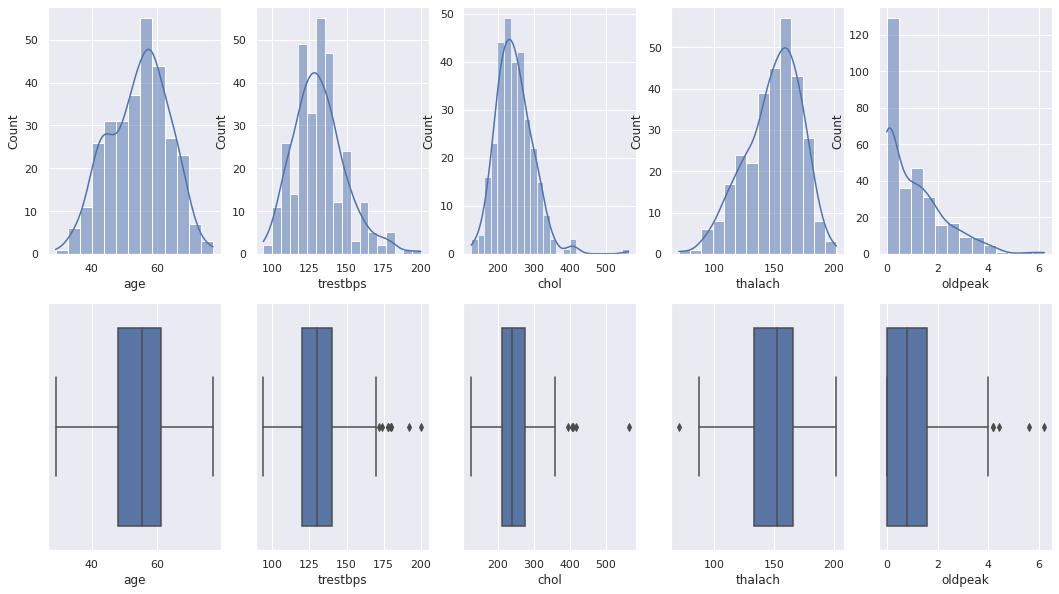

In [14]:
# FInding outliers and plotting histograms for all numerical features

plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
sns.histplot(heart_attack['age'],kde=True)
plt.subplot(2,5,6)
sns.boxplot(heart_attack['age'])
plt.subplot(2,5,2)
sns.histplot(heart_attack['trestbps'],kde=True)
plt.subplot(2,5,7)
sns.boxplot(heart_attack['trestbps'])
plt.subplot(2,5,3)
sns.histplot(heart_attack['chol'],kde=True)
plt.subplot(2,5,8)
sns.boxplot(heart_attack['chol'])
plt.subplot(2,5,4)
sns.histplot(heart_attack['thalach'],kde=True)
plt.subplot(2,5,9)
sns.boxplot(heart_attack['thalach'])
plt.subplot(2,5,5)
sns.histplot(heart_attack['oldpeak'],kde=True)
plt.subplot(2,5,10)
sns.boxplot(heart_attack['oldpeak']);

### Removing the outliers

In [15]:
for col in ['trestbps', 'chol', 'oldpeak']:
    
    Q1 = heart_attack[col].quantile(0.25)
    Q3 = heart_attack[col].quantile(0.75)
    IQR = Q3 - Q1
    
    heart_attack.loc[heart_attack[col] > Q3 + 1.5 * IQR, col] = heart_attack.describe().loc['50%'][col]

In [16]:
Q1 = heart_attack['thalach'].quantile(0.25)
Q3 = heart_attack['thalach'].quantile(0.75)
IQR = Q3 - Q1
min_thalach = Q1 - 1.5 * IQR

median_thalach = heart_attack.describe().loc['50%']['thalach']
heart_attack.loc[heart_attack['thalach'] < min_thalach, 'thalach'] = median_thalach

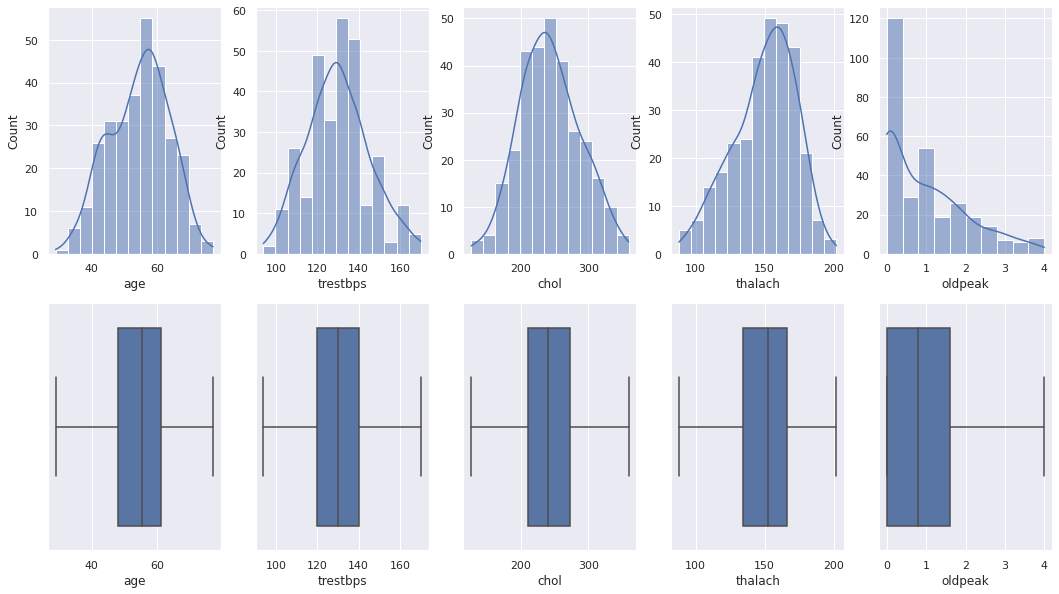

In [17]:
plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
sns.histplot(heart_attack['age'],kde=True)
plt.subplot(2,5,6)
sns.boxplot(heart_attack['age'])
plt.subplot(2,5,2)
sns.histplot(heart_attack['trestbps'],kde=True)
plt.subplot(2,5,7)
sns.boxplot(heart_attack['trestbps'])
plt.subplot(2,5,3)
sns.histplot(heart_attack['chol'],kde=True)
plt.subplot(2,5,8)
sns.boxplot(heart_attack['chol'])
plt.subplot(2,5,4)
sns.histplot(heart_attack['thalach'],kde=True)
plt.subplot(2,5,9)
sns.boxplot(heart_attack['thalach'])
plt.subplot(2,5,5)
sns.histplot(heart_attack['oldpeak'],kde=True)
plt.subplot(2,5,10)
sns.boxplot(heart_attack['oldpeak']);

In [18]:
for col in heart_attack.columns:
    print(col,":",heart_attack[col].unique().size)

age : 41
sex : 2
cp : 4
trestbps : 43
chol : 148
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 36
slope : 3
ca : 5
thal : 4
target : 2


## Exploratory Data Analysis

<AxesSubplot:xlabel='sex'>

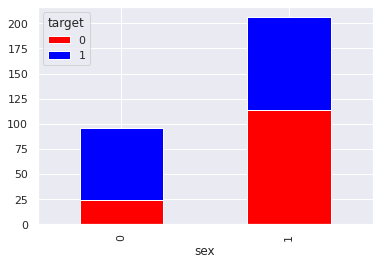

In [19]:
ha_plot = heart_attack.groupby(['sex','target']).size().reset_index().pivot(columns='target', index='sex', values=0)
ha_plot.plot(kind='bar', stacked=True, color=['red','blue'])

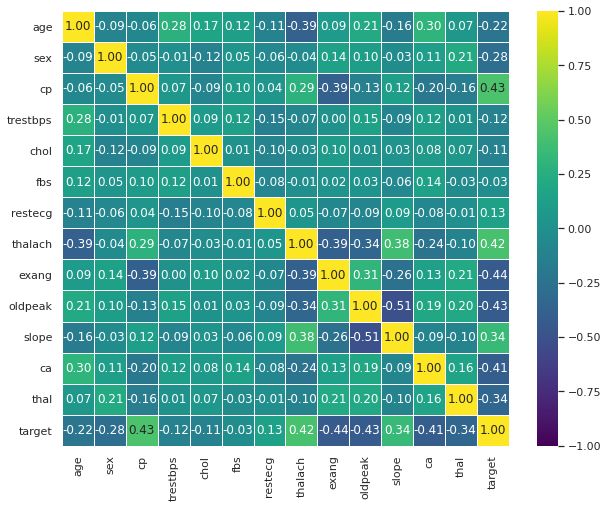

In [20]:
corrPearson = heart_attack.corr(method="pearson")

figure = plt.figure(figsize=(10,8))

cm = sns.heatmap(corrPearson,
               annot=True,
               fmt=".2f",
               linewidth=.5,
               cmap='viridis',
               vmin=-1, vmax=+1
               #cbar_pos=(1., .25, .03, .5)
                   )

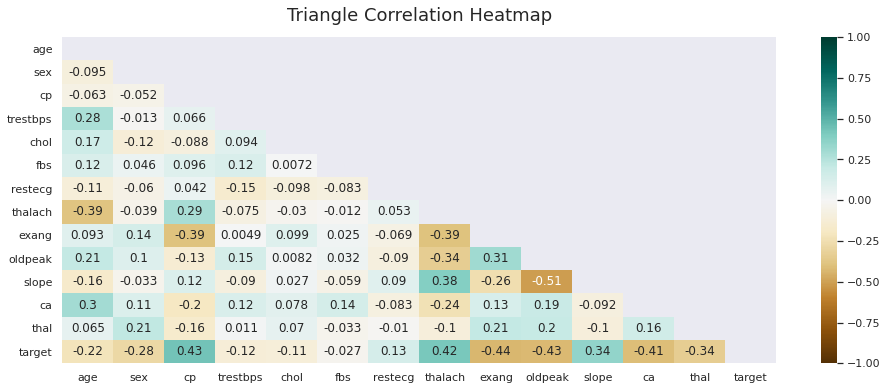

In [21]:
plt.figure(figsize=(16,6))

mask = np.triu(np.ones_like(corrPearson, dtype=np.bool))

heatmap = sns.heatmap(corrPearson, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

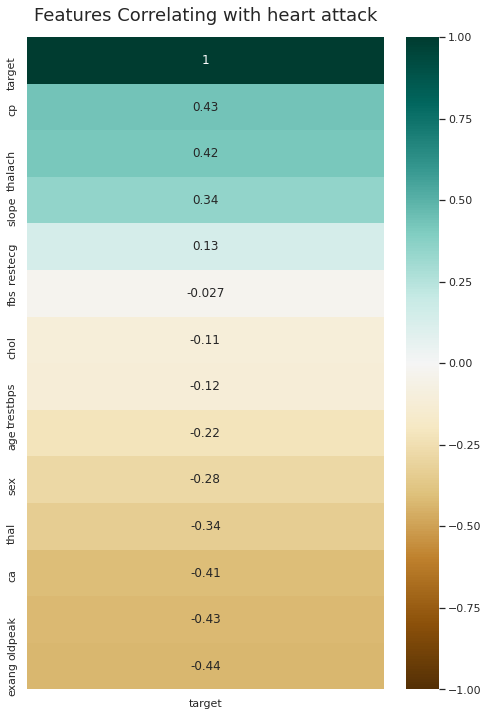

In [22]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrPearson[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with heart attack', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel='cp'>

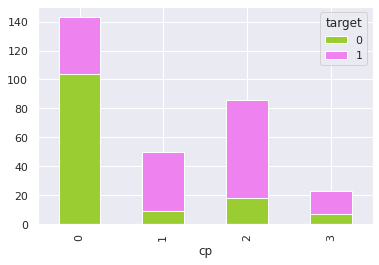

In [23]:
ha_plot = heart_attack.groupby(['target', 'cp']).size().reset_index().pivot(columns='target', index='cp', values=0)
ha_plot.plot(kind='bar', stacked=True, color=['yellowgreen','violet'])

<AxesSubplot:xlabel='fbs'>

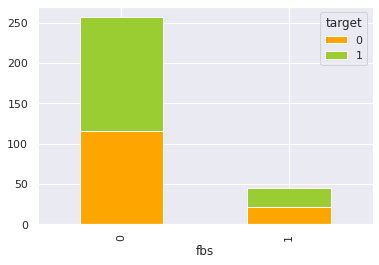

In [24]:
ha_plot = heart_attack.groupby(['target', 'fbs']).size().reset_index().pivot(columns='target', index='fbs', values=0)
ha_plot.plot(kind='bar', stacked=True, color=['orange', 'yellowgreen'])

<AxesSubplot:xlabel='exang'>

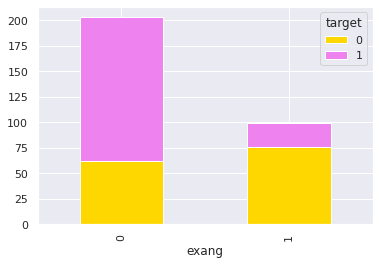

In [25]:
ha_plot = heart_attack.groupby(['target', 'exang']).size().reset_index().pivot(columns='target', index='exang', values=0)
ha_plot.plot(kind='bar', stacked=True, color=['gold', 'violet'])

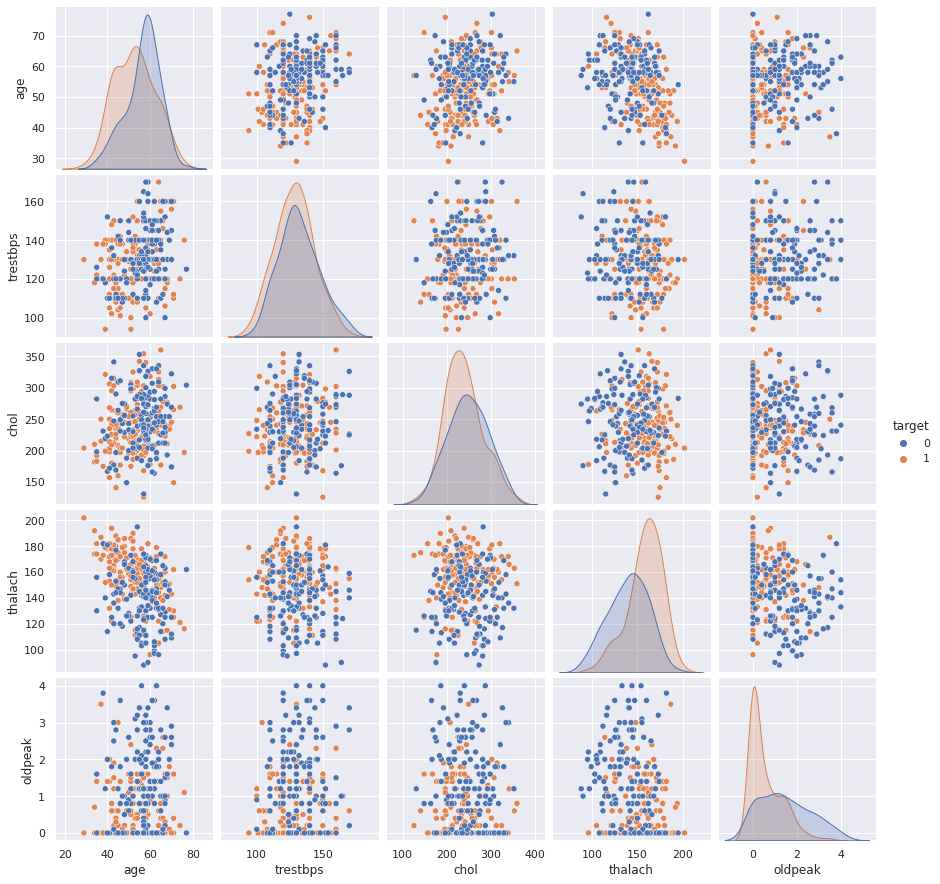

In [26]:
sns.pairplot(heart_attack[['age','trestbps','chol',
                 'thalach','oldpeak','target']],hue='target')

<AxesSubplot:xlabel='age', ylabel='count'>

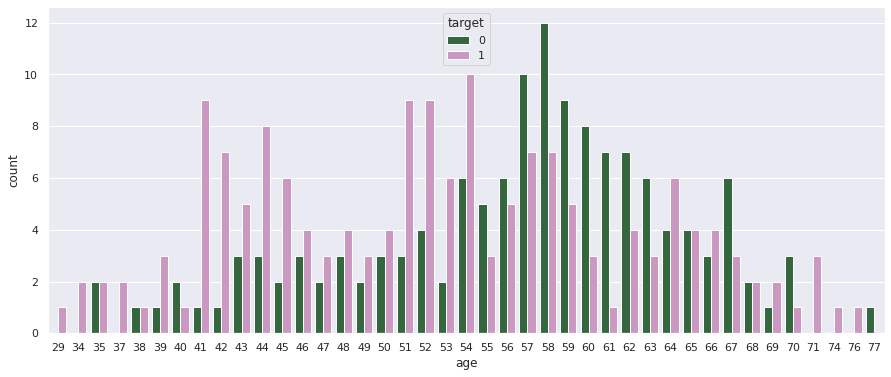

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = heart_attack, hue = 'target',palette='cubehelix')

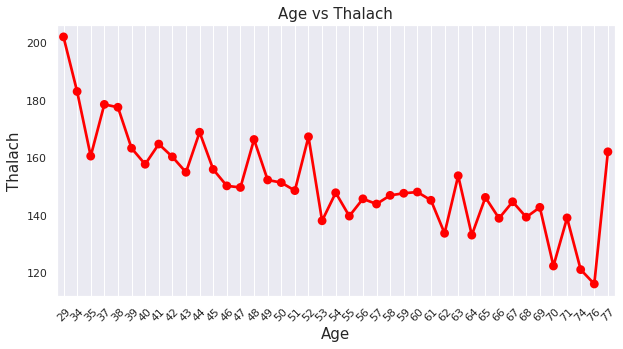

In [29]:
age_unique=sorted(heart_attack.age.unique())
age_thalach_values=heart_attack.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(heart_attack[heart_attack['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15)
plt.title('Age vs Thalach',fontsize = 15)
plt.grid()
plt.show()

## Machine learning models

### Creating Dummy variables

In [30]:
# Since 'cp', 'thal', 'fbs', 'restecg', 'ca'. 'exang' and 'slope' are categorical variables we'll turn them into dummy variables.
sex_dummy = pd.get_dummies(heart_attack['sex'], prefix = "sex")
cp_dummy = pd.get_dummies(heart_attack['cp'], prefix = "cp")
thal_dummy = pd.get_dummies(heart_attack['thal'], prefix = "thal")
slope_dummy = pd.get_dummies(heart_attack['slope'], prefix = "slope")
fbs_dummy = pd.get_dummies(heart_attack['fbs'], prefix = "fbs")
restecg_dummy = pd.get_dummies(heart_attack['restecg'], prefix = "restecg")
ca_dummy = pd.get_dummies(heart_attack['ca'], prefix = "ca")
exang_dummy = pd.get_dummies(heart_attack['exang'], prefix = "exang")

frames = [heart_attack, cp_dummy, thal_dummy, slope_dummy, fbs_dummy, restecg_dummy, ca_dummy, exang_dummy]
heart_attack = pd.concat(frames, axis = 1)

heart_attack = heart_attack.drop(columns = ['sex', 'cp', 'thal', 'slope', 'fbs', 'restecg', 'ca', 'exang'])
heart_attack.head()

,age,trestbps,chol,thalach,oldpeak,target,cp_0,cp_1,cp_2,cp_3,...,restecg_0,restecg_1,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,exang_0,exang_1
0,63,145.0,233.0,150.0,2.3,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,37,130.0,250.0,187.0,3.5,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130.0,204.0,172.0,1.4,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,56,120.0,236.0,178.0,0.8,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,57,120.0,354.0,163.0,0.6,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [31]:
heart_attack.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'slope_0', 'slope_1', 'slope_2', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'exang_0', 'exang_1'],
      dtype='object')

In [32]:
scaler = MinMaxScaler()

heart_scaled=scaler.fit_transform(heart_attack)
heart_scaled=pd.DataFrame(data=heart_scaled, columns=heart_attack.columns)

In [33]:
heart_scaled.head()

,age,trestbps,chol,thalach,oldpeak,target,cp_0,cp_1,cp_2,cp_3,...,restecg_0,restecg_1,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,exang_0,exang_1
0,0.708333,0.671053,0.457265,0.543860,0.575,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.166667,0.473684,0.529915,0.868421,0.875,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.473684,0.333333,0.736842,0.350,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.342105,0.470085,0.789474,0.200,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.342105,0.974359,0.657895,0.150,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
y = heart_scaled['target']
X = heart_scaled.drop(columns = ['target'])

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state = 0
                                                   )

### Logistic Regression with GridSearch

In [35]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

score_lr=np.mean(cross_val_score(lr_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_lr)

lr_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.615848211066026, 'solver': 'liblinear'}
Accuracy is :  0.8382716049382717


LogisticRegression(C=0.615848211066026, solver='liblinear')

In [36]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

Text(0.5, 1.0, 'F1 Score = 0.8823529411764706')

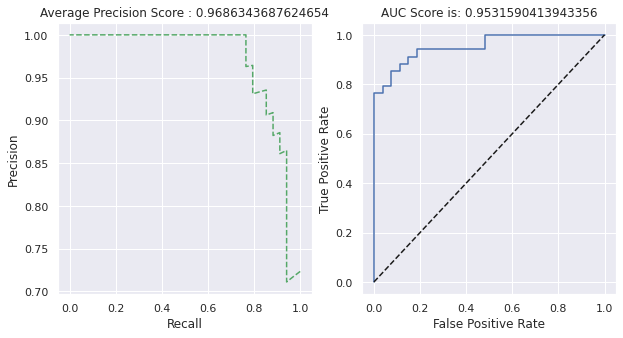

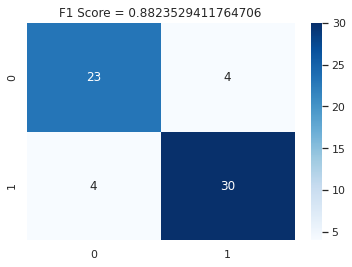

In [37]:
plotting(y_test,lr_clf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,lr_clf.predict(X_test)), annot= True, cmap='Blues')
lr_f1=f1_score(y_test,lr_clf.predict(X_test))
plt.title('F1 Score = {}'.format(lr_f1))

In [38]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])


### K Nearest Neighbors searching through a range of neighbors

In [39]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


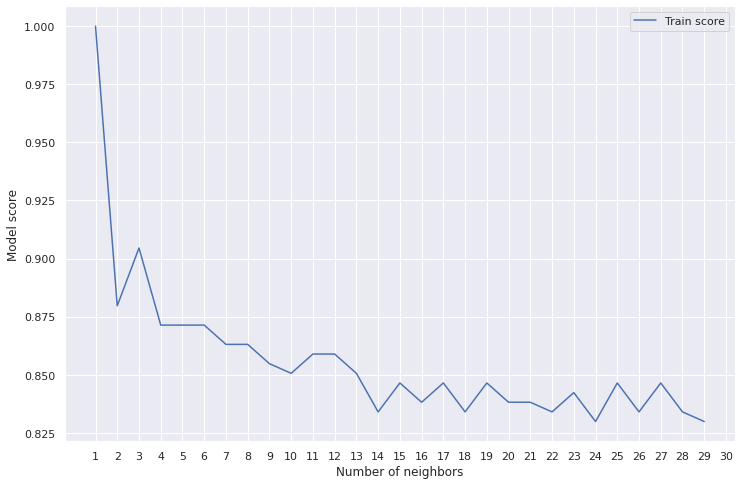

In [40]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [41]:
knn_clf = KNeighborsClassifier(n_neighbors=24)
knn_clf.fit(X_train, y_train)

score_k=np.mean(cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_k)

Accuracy is :  0.8423868312757202


Text(0.5, 1.0, 'F1 Score = 0.8695652173913043')

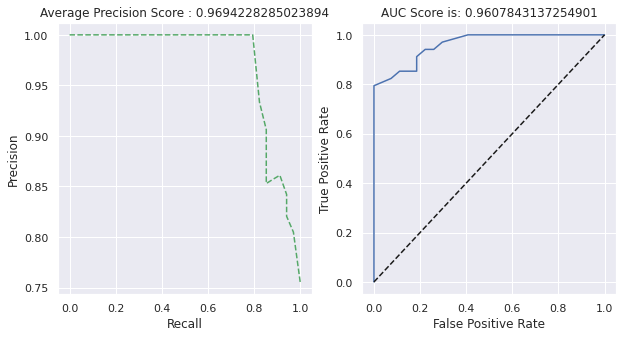

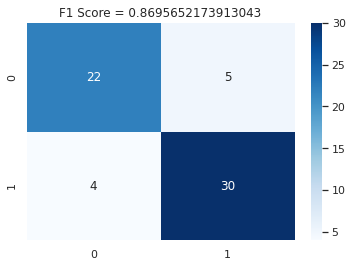

In [42]:
plotting(y_test,knn_clf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,knn_clf.predict(X_test)), annot= True, cmap='Blues')
knn_f1=f1_score(y_test,knn_clf.predict(X_test))
plt.title('F1 Score = {}'.format(knn_f1))

In [43]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


### Support Vector Machine

In [44]:
svm_clf = SVC(C= 2, gamma= 0.1, kernel= 'rbf',probability=True)

# params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
#           "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
#           "kernel":('linear', 'poly', 'rbf'),
#          }

# svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
# svm_cv.fit(X_train, y_train)
# best_params = svm_cv.best_params_
# print(f"Best params: {best_params}")

# svm_clf = SVC(**best_params)

svm_clf.fit(X_train, y_train)

score_svm=np.mean(cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_svm)

Accuracy is :  0.8507201646090534


Text(0.5, 1.0, 'F1 Score = 0.8985507246376812')

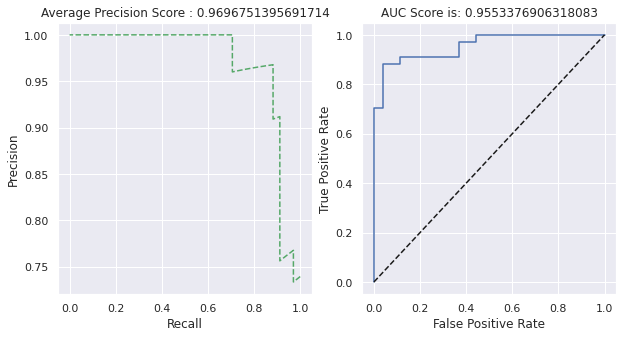

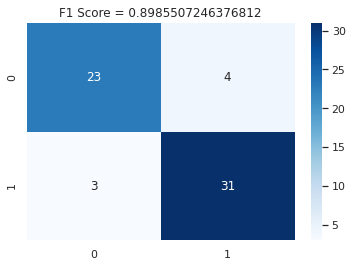

In [45]:
plotting(y_test,svm_clf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,svm_clf.predict(X_test)), annot= True, cmap='Blues')
svm_f1=f1_score(y_test,svm_clf.predict(X_test))
plt.title('F1 Score = {}'.format(svm_f1))

In [46]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


### Decision Tree Classifier with GridSearch

In [47]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

score_tree=np.mean(cross_val_score(tree_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_tree)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 11, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy is :  0.854783950617284


Text(0.5, 1.0, 'F1 Score = 0.7536231884057971')

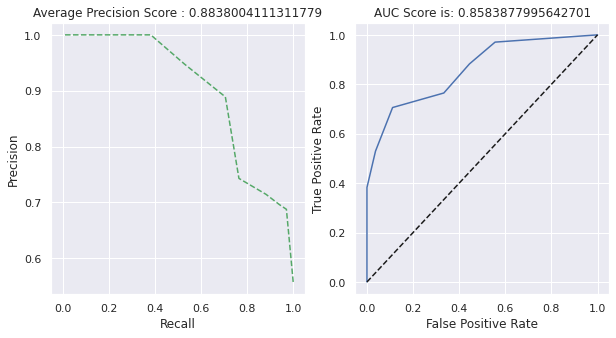

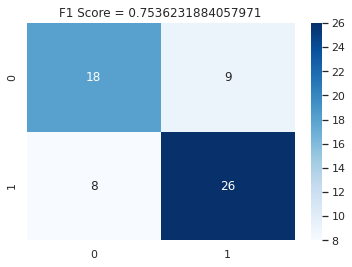

In [48]:
plotting(y_test,tree_clf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,tree_clf.predict(X_test)), annot= True, cmap='Blues')
tree_f1=f1_score(y_test,tree_clf.predict(X_test))
plt.title('F1 Score = {}'.format(tree_f1))

In [49]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


### Random Forest with GridSearch

In [50]:
# Create the parameter grid based on the results of random search 
params_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

score_rf=np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_rf)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Accuracy is :  0.8258744855967078


Text(0.5, 1.0, 'F1 Score = 0.8787878787878787')

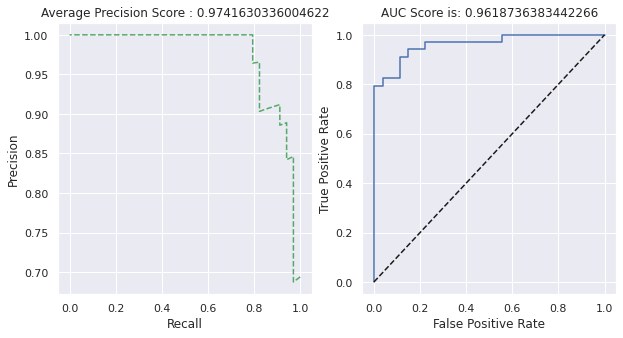

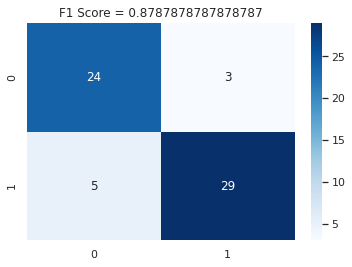

In [51]:
plotting(y_test,rf_clf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,rf_clf.predict(X_test)), annot= True, cmap='Blues')
rf_f1=f1_score(y_test,rf_clf.predict(X_test))
plt.title('F1 Score = {}'.format(rf_f1))

In [52]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)

### Extra Trees Classifier

Accuracy is :  0.8049897119341564


Text(0.5, 1.0, 'F1 Score = 0.8985507246376812')

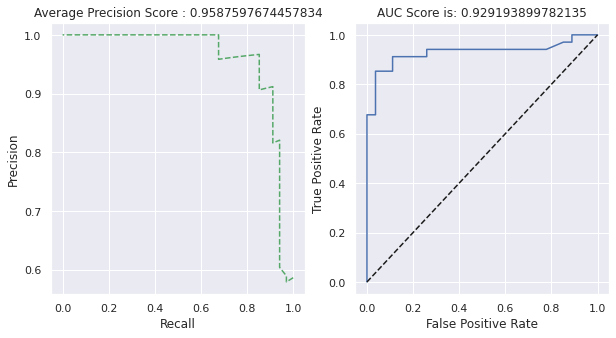

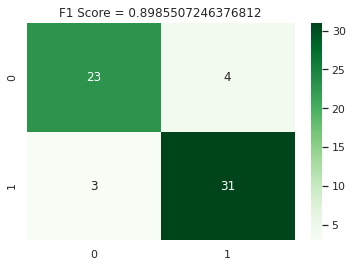

In [53]:
etc=ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=2)

etc.fit(X_train,y_train)

score_etc=np.mean(cross_val_score(etc, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_etc)

plotting(y_test,etc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,etc.predict(X_test)), annot= True, cmap='Greens')

etc_f1=f1_score(y_test,etc.predict(X_test))
plt.title('F1 Score = {}'.format(etc_f1))

In [54]:
test_score = accuracy_score(y_test, etc.predict(X_test)) * 100
train_score = accuracy_score(y_train, etc.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Extra Trees Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


### Gradient Boosting Classfier

Accuracy is :  0.8217592592592592


Text(0.5, 1.0, 'F1 Score = 0.8529411764705882')

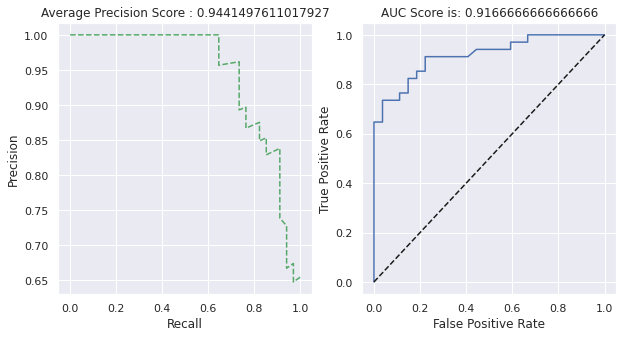

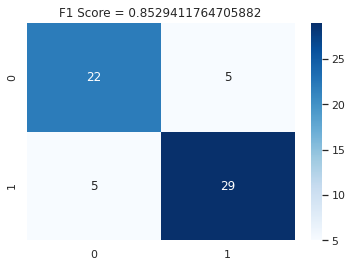

In [55]:
gbc=GradientBoostingClassifier(n_estimators=100, random_state=43, learning_rate = 0.01)

gbc.fit(X_train,y_train)

score_gbc=np.mean(cross_val_score(gbc, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_gbc)

plotting(y_test,gbc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,gbc.predict(X_test)), annot= True, cmap='Blues')

gbc_f1=f1_score(y_test,gbc.predict(X_test))
plt.title('F1 Score = {}'.format(gbc_f1))

In [56]:
test_score = accuracy_score(y_test, gbc.predict(X_test)) * 100
train_score = accuracy_score(y_train, gbc.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Gradient Boosting Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


### Bagging Classifier

Accuracy is :  0.8425411522633744


Text(0.5, 1.0, 'F1 Score = 0.8857142857142858')

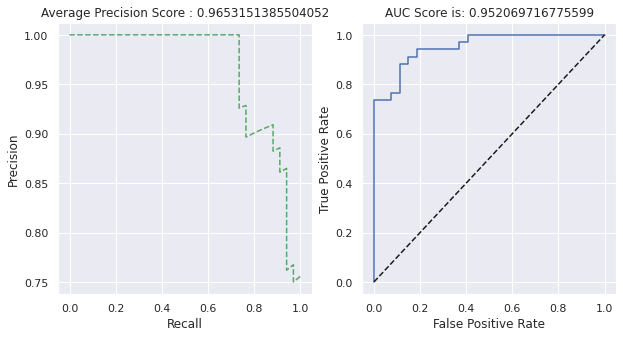

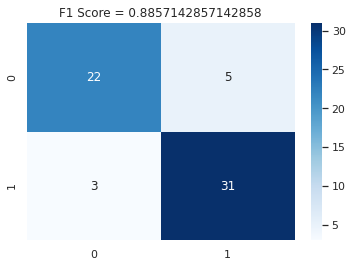

In [57]:
bc=BaggingClassifier(lr_clf,max_samples=23, bootstrap=True, n_jobs= -1)

bc.fit(X_train,y_train)

score_bc=np.mean(cross_val_score(bc, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_bc)

plotting(y_test,bc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,bc.predict(X_test)), annot= True, cmap='Blues')

bc_f1=f1_score(y_test,bc.predict(X_test))
plt.title('F1 Score = {}'.format(bc_f1))

In [58]:
test_score = accuracy_score(y_test, bc.predict(X_test)) * 100
train_score = accuracy_score(y_train, bc.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Bagging Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)

Text(0.5, 1.0, 'Feature Importance')

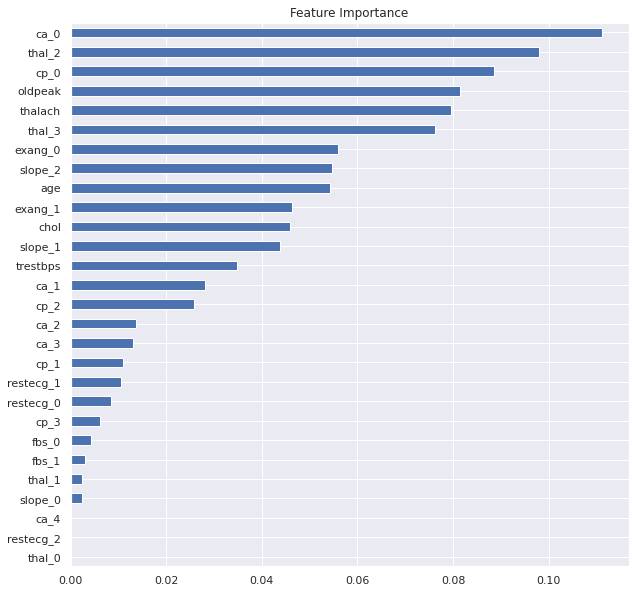

In [59]:
## Feature Importance

fig= plt.figure(figsize=(10,10))
important=pd.Series(rf_clf.feature_importances_, index= X_train.columns)
important.sort_values().plot.barh()
plt.title('Feature Importance')

Text(0.5, 1.0, 'Model Accuracy')

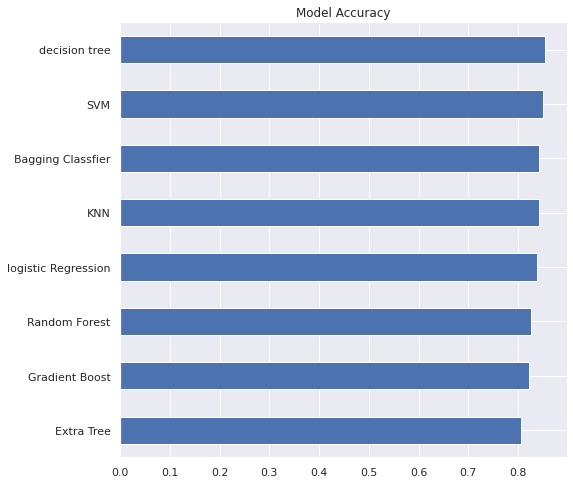

In [60]:
model_accuracy = pd.Series(data=[score_k, score_lr, score_tree, score_svm, score_rf, score_etc, 
                            score_gbc, score_bc], 
                           index=['KNN','logistic Regression','decision tree', 'SVM', 'Random Forest',
                            'Extra Tree',  'Gradient Boost','Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

Text(0.5, 1.0, 'Model F1 Score Comparison')

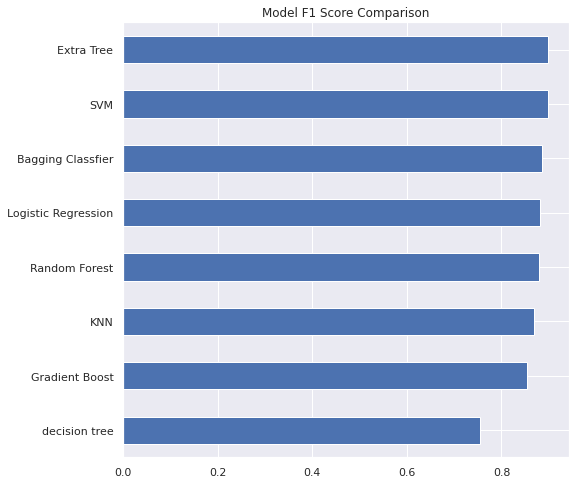

In [61]:
model_f1_score = pd.Series(data=[knn_f1, lr_f1, tree_f1, svm_f1, rf_f1, etc_f1, 
                           gbc_f1, bc_f1], 
                           index=['KNN','Logistic Regression','decision tree', 'SVM', 'Random Forest',
                                'Extra Tree', 'Gradient Boost', 'Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_f1_score.sort_values().plot.barh()
plt.title('Model F1 Score Comparison')

In [62]:
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,87.136929,86.885246
1,Tuned K-nearest neighbors,82.987552,85.245902
2,Support Vector Machine,89.626556,88.524590
3,Tuned Decision Tree Classifier,85.892116,72.131148
4,Tuned Random Forest Classifier,91.286307,86.885246
5,Extra Trees Classifier,100.000000,88.524590
6,Gradient Boosting Classifier,89.211618,83.606557
7,Bagging Classifier,85.892116,86.885246


## Conclusion

In this report, the heart attack dataset from UCI was explored to find the most suitable ML algorithm for the prediction of a possible myocardial infarction (**classification task**)

After some feature engineering of the acquired dataset, and the removal of both duplicate and outlier values, some numerical variables were explored by creating their corresponding plots. 

Overall, the dataset didn't require a lot of change and is of good quality. Nonetheless, it would be beneficial if there were more than 302 observations. Further suggestions for improving the quality of this dataset are to add features that are responsible for myocardial infarctions, like the diet, smoking information of the patient, and type of diabetes (if eligible). 

A correlation heatmap was then created to find which variables are correlated, to what degree, in which direction, while furthermore, it is useful for observing any multicollinearity problems.

Next, the dataset was preprocessed by creating dummy variables and scaling the numerical features before the creation of the ML models. In particular, 8 models were instantiated, a logistic regression, a k-nearest neighbors, a support vector machine, a decision tree classifier, a random forest classifier, an extra trees classifier, a gradient boosting classifier, and a bagging classifier model. Four of those (i.e. logistic regression, k-nearest neighbors, decision tree, and random forest classifier) were explored further, for tuning their hyperparameters by using grid-search. 

Based on the models' accuracy findings, the most suitable algorithms are the decision tree classifier (~0.855 accuracy), the support vector machine (with approximately 0.85 accuracy score), and third, being bagging classifier model (0.84 accuracy). However, the comparison between the f1 scores shows that the best model is the extra tree classifier. Considering that all accuracy metrics and f1 scores of the best models are very similar, here the **Support Vector Machine model** was selected as the most suitable in our case. 

### Next Steps

Next to our exploration would be the creation of a voting classifier model by combining the Support Vector Machine, the Extra tree classifier, and the bagging classifier model. For even better results, one could create a stacking model.